In [1]:
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
#ucitavanje skupa
df = pd.read_csv("C:/Users/student/Desktop/ipVezbe122021/primeri/studenti.csv")

In [4]:
df

INDEKS                                 SMER  DUZINA_STUDIRANJA  \
0    20060018    Profesor matematike i racunarstva                  4   
1    20060019  Numericka matematika i optimizacija                  4   
2    20060020    Profesor matematike i racunarstva                  6   
3    20060022    Profesor matematike i racunarstva                  4   
4    20060026            Racunarstvo i informatika                  4   
..        ...                                  ...                ...   
436  20090217                           Matematika                  4   
437  20090272                           Matematika                  4   
438  20090339                          Informatika                  4   
439  20090340            Racunarstvo i informatika                  3   
440  20090345            Racunarstvo i informatika                  3   

     POLOZENO_ISPITA  PROSEK  
0                 38    7.60  
1                 40    9.55  
2                 38    6.89  
3                 38    8.57  
4                 39    9.87  
..               ...     ...  
436               43    8.72  
437               42    7.69  
438               29    7.06  
439               40    6.80  
440               40    7.35  

[441 rows x 5 columns]

In [3]:
#Atribut INDEKS nece biti koriscen pri klasterovanju jer je jedinstven za svakog studenta.
use_columns = df.columns[1:]
print('Kolone za klasterovanje', use_columns.tolist())

#Za klasterovanje se koriste 3 numericka i 1 kategoricki atribut.
# Da bi kategoricki atribut mogao da se koristi u klasterovanju
# mora biti pretvoren u jedan ili vise numerickih atributa, te ce nad
# njim biti izvrsena binarizacija.
# Funkcija pd.get_dummies vrsi binarizaciju nad svim nenumerickim atributima u objektu klase DataFrame.
# Svaki novi atribut dobijen binarizacijom kategorickog atributa kao prefiks ima ime
# originalnog atributa na osnovu koga je nastao.
df_trans=pd.get_dummies(df[use_columns])

print('Kolone nakon izvrsene binarizacije ')
print(df_trans.columns.tolist())


Kolone za klasterovanje ['SMER', 'DUZINA_STUDIRANJA', 'POLOZENO_ISPITA', 'PROSEK']
Kolone nakon izvrsene binarizacije 
['DUZINA_STUDIRANJA', 'POLOZENO_ISPITA', 'PROSEK', 'SMER_Astrofizika', 'SMER_Astronomija i astrofizika', 'SMER_Informatika', 'SMER_Matematika', 'SMER_Numericka matematika i optimizacija', 'SMER_Profesor matematike i racunarstva', 'SMER_Racunarstvo i informatika', 'SMER_Statistika, aktuarska i finansijska matematika', 'SMER_Teorijska matematika i primene']


In [5]:
#normalizacija atributa
x = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df_trans), columns = df_trans.columns)


In [6]:
# Pri hijerarhijskom klasterovanju bice korisceno euklidsko rastojanje,
# pa ce vrednost 1 u atributima dobijenim na osnovu kategorickog atributa SMER
# biti zamenjena sa sqrt(0.5), da bi svi originalni atributi imali isti uticaj
# pri klasterovanju.
dummy_cols = [col for col in x.columns.tolist() if col.startswith('SMER')]
for col in dummy_cols:
    x[col].replace(1, math.sqrt(0.5), inplace=True )


In [7]:
x

DUZINA_STUDIRANJA  POLOZENO_ISPITA    PROSEK  SMER_Astrofizika  \
0             0.250000         0.666667  0.340659               0.0   
1             0.250000         0.777778  0.876374               0.0   
2             0.416667         0.666667  0.145604               0.0   
3             0.250000         0.666667  0.607143               0.0   
4             0.250000         0.722222  0.964286               0.0   
..                 ...              ...       ...               ...   
436           0.250000         0.944444  0.648352               0.0   
437           0.250000         0.888889  0.365385               0.0   
438           0.250000         0.166667  0.192308               0.0   
439           0.166667         0.777778  0.120879               0.0   
440           0.166667         0.777778  0.271978               0.0   

     SMER_Astronomija i astrofizika  SMER_Informatika  SMER_Matematika  \
0                               0.0          0.000000         0.000000   
1                               0.0          0.000000         0.000000   
2                               0.0          0.000000         0.000000   
3                               0.0          0.000000         0.000000   
4                               0.0          0.000000         0.000000   
..                              ...               ...              ...   
436                             0.0          0.000000         0.707107   
437                             0.0          0.000000         0.707107   
438                             0.0          0.707107         0.000000   
439                             0.0          0.000000         0.000000   
440                             0.0          0.000000         0.000000   

     SMER_Numericka matematika i optimizacija  \
0                                    0.000000   
1                                    0.707107   
2                                    0.000000   
3                                    0.000000   
4                                    0.000000   
..                                        ...   
436                                  0.000000   
437                                  0.000000   
438                                  0.000000   
439                                  0.000000   
440                                  0.000000   

     SMER_Profesor matematike i racunarstva  SMER_Racunarstvo i informatika  \
0                                  0.707107                        0.000000   
1                                  0.000000                        0.000000   
2                                  0.707107                        0.000000   
3                                  0.707107                        0.000000   
4                                  0.000000                        0.707107   
..                                      ...                             ...   
436                                0.000000                        0.000000   
437                                0.000000                        0.000000   
438                                0.000000                        0.000000   
439                                0.000000                        0.707107   
440                                0.000000                        0.707107   

     SMER_Statistika, aktuarska i finansijska matematika  \
0                                                  0.0     
1                                                  0.0     
2                                                  0.0     
3                                                  0.0     
4                                                  0.0     
..                                                 ...     
436                                                0.0     
437                                                0.0     
438                                                0.0     
439                                                0.0     
440                                                0.0     

    

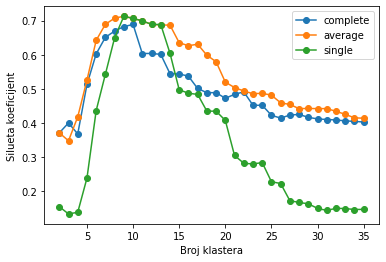

In [11]:
# primena hijerarhijskog sakupljajuceg klasterovanja za razlicite veze i broj klastera
for link in ['complete', 'average', 'single']:

    # recnik koji ce sadrzati silueta koeficijent za razlicit broj izdvojenih klastera
    silhouette_scores = {'clusters': [], 'score': []}

    for i in range(2,36):
        # primena algoritma za i klastera
        est = AgglomerativeClustering(n_clusters=i, linkage=link)
        est.fit(x)

        #cuvanje podataka o broju klastera i silueta koeficijentu za izvrseno klasterovanje
        #radi grafickog prikaza
        silhouette_scores['clusters'].append(i)
        silhouette_scores['score'].append(silhouette_score(x, est.labels_))

    # prikaz rezultata klasterovanja pomocu grafika broj klastera - senka koeficijent
    # za vezu koriscenu pri hijerarhijskom klasterovanju
    plt.plot(silhouette_scores['clusters'], silhouette_scores['score'], marker='o', label=link)

    #izdvajanje optimalnog broja klastera sa zadatim parametrima pri klasterovanju
    # na osnovu silueta koeficijenta
    best_num_clusters = silhouette_scores['clusters'][np.argmax(silhouette_scores['score'])]

    print('#######################################################################')
    print('Veza', link, 'broj klastera sa najvecim senka koeficijentom', best_num_clusters)
    
    #primena klasterovanja sa optimalnim brojem klastera da bi se
    #izdvojile deskriptivne statistike za svaki klaster
    est = AgglomerativeClustering(n_clusters=i, linkage=link)
    est.fit(x)
    df['label']=est.labels_

    #racuanje i prikaz deskriptivnih statistika za svaki izdvojeni klaster
    for j in range(0, best_num_clusters):
        cluster = df.loc[df['label'] == j, :]
        print('***********************************************************')
        print('Klaster', j)
        print(cluster.describe(include='all'))

# postavljanje teksta za x i y osu
plt.xlabel('Broj klastera')
plt.ylabel('Silueta koeficijent')

# prikaz legende na slici
plt.legend()


In [8]:
#Na osnovu dobijene slike, vidi se da je za sve tri primenjene veze za odredjivanje
# bliskosti dva klastera pri hijerarhijskom klasterovanju, optimalan broj klastera 9 ili 10.
